# Assignment 2: Pratical Machine Learning Project

## Introduction



### Define Problem
#### The emergence and popularity of the Internet have brought a lot of information to users, which satisfies the user's demand for information in the information age. However, with the rapid development of the network, the amount of online information has increased dramatically, and users are faced with a large amount of data, so users cannot quickly filter out useful information from a large amount of data. The appearance of the recommendation system can effectively solve the information overload problem. The task of the recommendation system is to contact users and information, on the one hand, to help users find information that is valuable to them, and on the other side to enable data to be presented to users who are interested in it, thereby achieving a win-win situation for information consumers and information producers. This article will build a recommendation system that categorizes music based on melody, which to recommend a corresponding genre for those songs.


### Justify Significance
#### The recommendation system is a personalized system that recommends information and products according to the information needs and interests of the user. Compared with the search engine, the recommendation system conducts personalized calculation by studying the user's interest preference, and the system discovers the user's interest points, thereby guiding the user to find their own information needs. An excellent recommendation system not only saves users' time and provides personalized service for users, but also establishes a close relationship with users, allowing users to rely on recommendations. This paper classifies and recommends the genre of songs by extracting melody features and processing audio signals. This recommendation method can be applied to multiple scenarios, such as news recommendations, picture recommendations, and music recommendations. Compared to the recommended method of collaborative filtering，n based on content recommendation do not have the issue of cold start. It does not require the user's usual data to make recommendations, and there is no prevalence bias. It can recommend items with rare features to better meet the individual needs of users.

## Exploration



### Source of the data
#### The data used in this article is from the FMA (Free Music Archive) website. The site is an open and easy-to-access data set for evaluating multiple tasks in MIR. It provides full-length and high-quality audio, as well as track and user-level metadata, tags, and free-form text such as biographies. The audio comes from 14,854 albums by 16,341 artists and contains a total of 106,574 tracks. The project of genres recommendation decided to use 25,000 of the tracks, and all the records are only 30s. This article also uses two CSV files provided by the site, one is tracks.csv, which contains metadata for all tracks, such as ID, title, artist, genre, tag and play count. Another one is genres.csv, which includes all the ID of music genres and their names.

### Data preprocessing
#### The data preprocessing in this paper is mainly divided into two steps. The first step is to extract the music features of each song and write the extracted features into a new CSV file named features.csv. The specific operations are as follows:

(1)	Import the python library to be used. This step mainly uses the librosa library to extract music features;
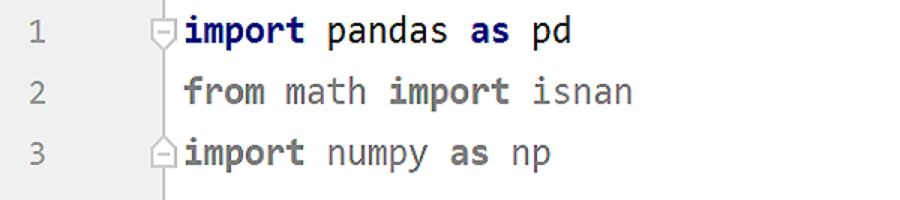

(2)	Read the music files under each folder;
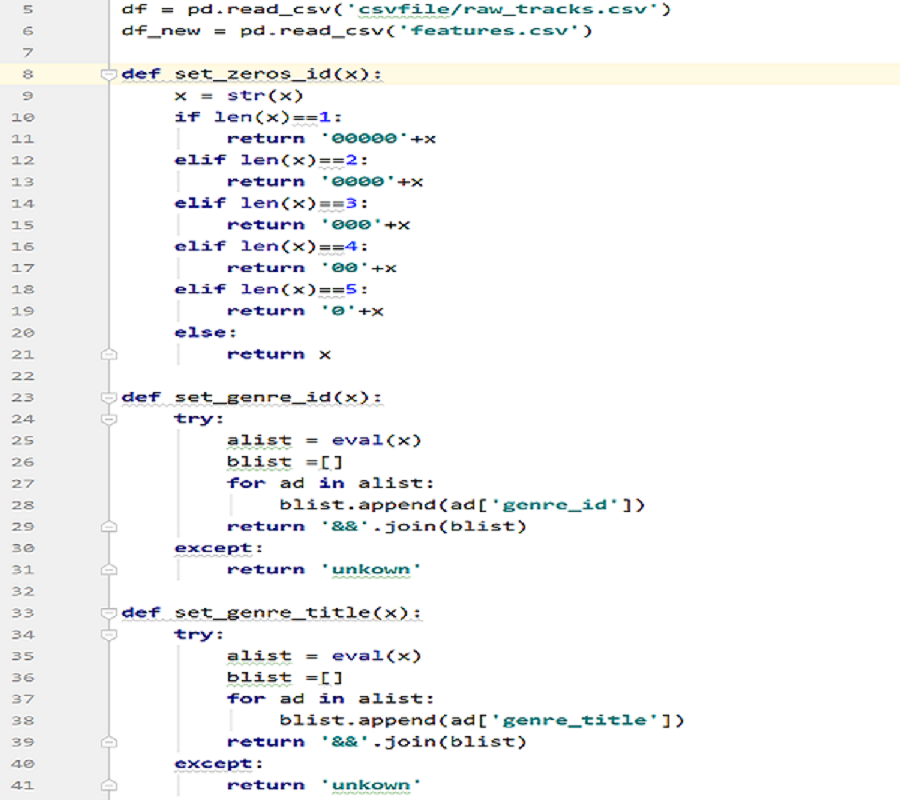

(3)	Extracting features of the music file;
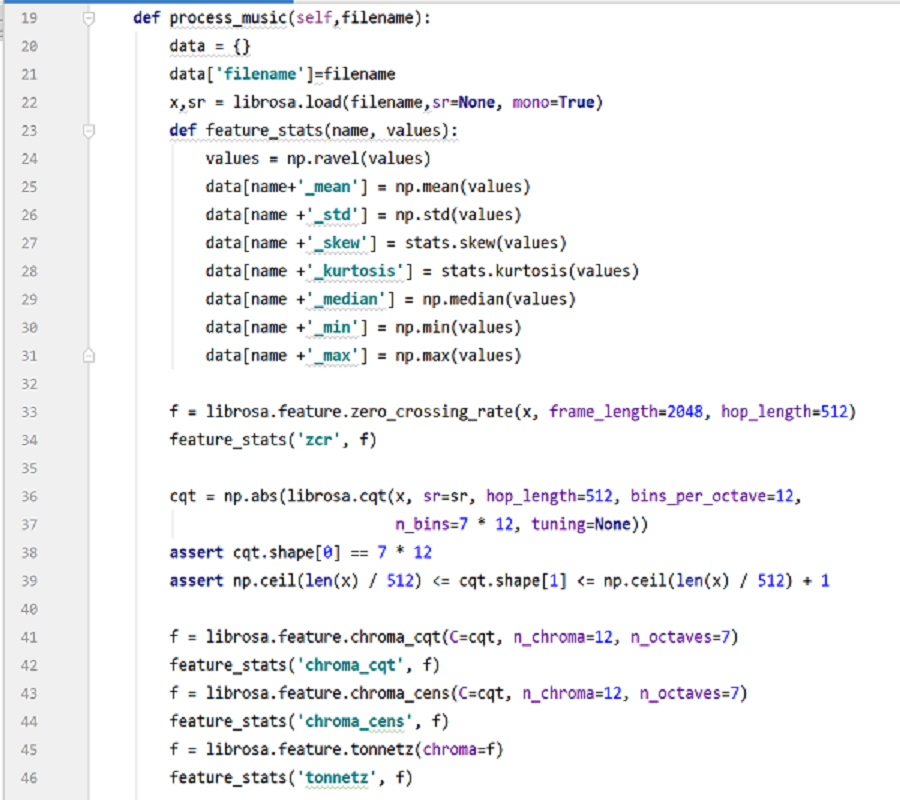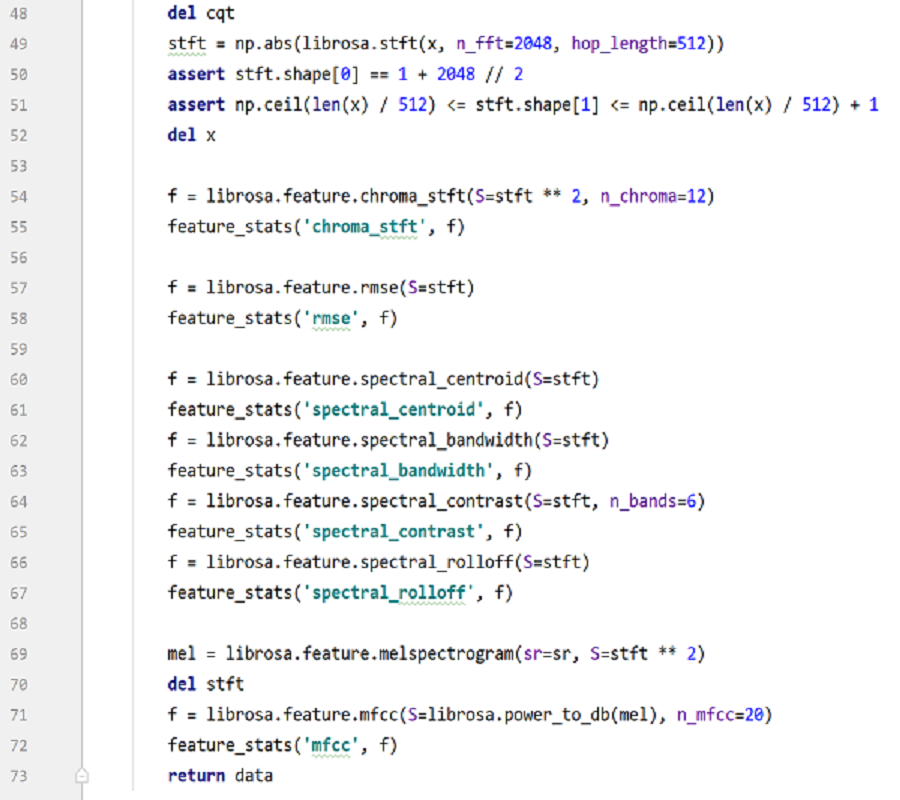

(4)	Extract the features of each music file;
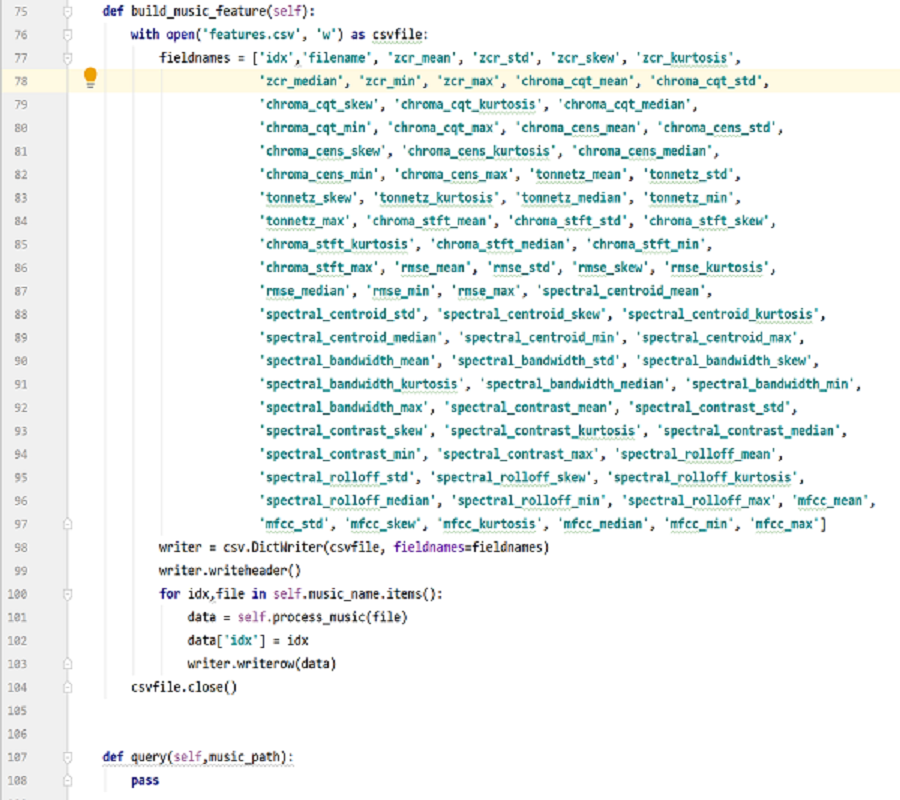

#### The second step of data preprocessing is to map the previously extracted music features to the musician name, track ID, genre, etc., and write a new CSV file named newfeatures.csv. (This file will be used in subsequent operations) The specific steps are as follows:

(1) Import the python library you need to use. This step mainly uses the pandas library to process the data.
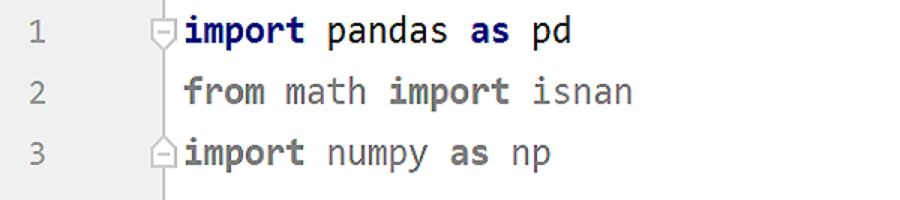

(2) Combine and correspond to the tracks.csv and genres.csv previously obtained from the FMA website and the features.csv file just generated.
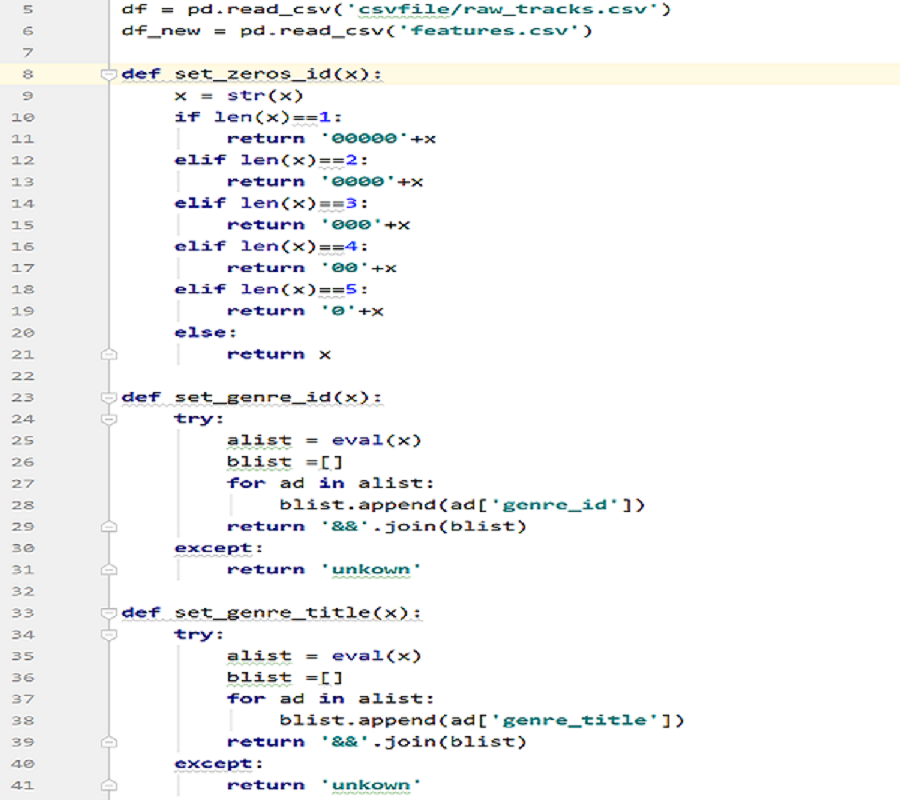

(3) Reset track_id and write to newfeatures.csv.
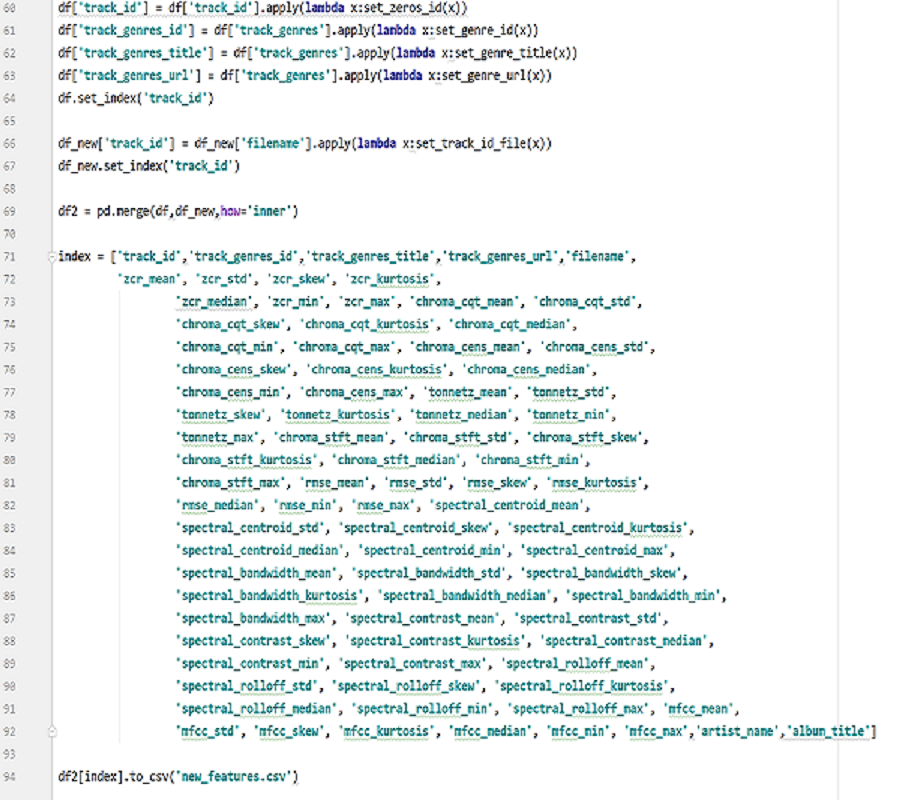


### Data preparation
#### This section will mainly use the newfeatures.csv file. The specific steps are as follows:
(1) Upload files locally to the cloud。

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

（2）Import the Python library which needs to use.

In [0]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler

（3）Import the newfeatures.csv file. The table below shows that one column is an invalid column.

In [10]:
df = pd.read_csv('new_features.csv')
df.head(5)

,Unnamed: 0,track_id,track_genres_id,track_genres_title,track_genres_url,filename,zcr_mean,zcr_std,zcr_skew,zcr_kurtosis,zcr_median,zcr_min,zcr_max,chroma_cqt_mean,chroma_cqt_std,chroma_cqt_skew,chroma_cqt_kurtosis,chroma_cqt_median,chroma_cqt_min,chroma_cqt_max,chroma_cens_mean,chroma_cens_std,chroma_cens_skew,chroma_cens_kurtosis,chroma_cens_median,chroma_cens_min,chroma_cens_max,tonnetz_mean,tonnetz_std,tonnetz_skew,tonnetz_kurtosis,tonnetz_median,tonnetz_min,tonnetz_max,chroma_stft_mean,chroma_stft_std,chroma_stft_skew,chroma_stft_kurtosis,chroma_stft_median,chroma_stft_min,...,rmse_median,rmse_min,rmse_max,spectral_centroid_mean,spectral_centroid_std,spectral_centroid_skew,spectral_centroid_kurtosis,spectral_centroid_median,spectral_centroid_min,spectral_centroid_max,spectral_bandwidth_mean,spectral_bandwidth_std,spectral_bandwidth_skew,spectral_bandwidth_kurtosis,spectral_bandwidth_median,spectral_bandwidth_min,spectral_bandwidth_max,spectral_contrast_mean,spectral_contrast_std,spectral_contrast_skew,spectral_contrast_kurtosis,spectral_contrast_median,spectral_contrast_min,spectral_contrast_max,spectral_rolloff_mean,spectral_rolloff_std,spectral_rolloff_skew,spectral_rolloff_kurtosis,spectral_rolloff_median,spectral_rolloff_min,spectral_rolloff_max,mfcc_mean,mfcc_std,mfcc_skew,mfcc_kurtosis,mfcc_median,mfcc_min,mfcc_max,artist_name,album_title
0,0,2,21,Hip-Hop,http://freemusicarchive.org/genre/Hip-Hop/,musicPath/000/000002.mp3,0.098366,0.068404,1.825609,3.496868,0.078613,0.006348,0.416504,0.566460,0.253033,0.087965,-0.977706,0.562102,0.029171,1.0,0.268067,0.107115,0.711202,0.533185,0.249656,0.000063,0.686498,0.021052,0.037268,1.700474,5.229453,0.013752,-0.072709,0.286115,0.424068,0.290613,0.618902,-0.713812,0.360649,0.002274,...,3.220507,0.002742,14.222774,1842.291742,700.993537,1.221557,1.136937,1640.640913,510.591350,4337.322610,1748.564847,299.211364,0.397007,0.372977,1733.594662,980.079382,2836.219037,20.841235,9.929560,1.684280,1.760795,17.544437,4.297360,56.791453,3709.932382,1143.797297,0.461345,-0.349026,3628.344727,775.195312,7181.323242,-1.255037,44.957669,-0.488827,7.116079,-1.281519,-505.499156,196.866785,AWOL,AWOL - A Way Of Life
1,1,5,21,Hip-Hop,http://freemusicarchive.org/genre/Hip-Hop/,musicPath/000/000005.mp3,0.059331,0.047805,2.089943,6.147398,0.047852,0.002930,0.320801,0.579368,0.242654,0.166381,-0.973910,0.561531,0.051817,1.0,0.272554,0.095120,0.443803,0.077574,0.258191,0.000552,0.629300,-0.004345,0.037420,-0.767869,4.130974,-0.003199,-0.195453,0.131228,0.458492,0.297472,0.429180,-1.000181,0.405381,0.002467,...,3.127500,0.003688,11.175623,1464.426230,600.437248,1.016019,1.304029,1373.306590,408.008108,3968.347245,1692.773284,294.878625,-0.269669,0.203623,1707.350958,821.724543,2622.027755,20.646112,9.538316,1.563012,1.439073,17.643702,3.458741,52.483894,3177.796813,1105.743256,0.084749,-0.058992,3240.747070,570.629883,6782.958984,1.717271,51.783643,-1.060930,7.649989,2.063177,-527.565765,209.443283,AWOL,AWOL - A Way Of Life
2,2,10,10,Pop,http://freemusicarchive.org/genre/Pop/,musicPath/000/000010.mp3,0.081014,0.020832,0.907677,2.130873,0.079102,0.028320,0.188477,0.619932,0.211336,0.194898,-0.770927,0.602694,0.088817,1.0,0.274436,0.089545,0.468371,-0.051703,0.251022,0.003584,0.563606,-0.016401,0.049924,-0.329575,1.247760,-0.008881,-0.200253,0.193459,0.431167,0.264707,0.866931,-0.249768,0.361358,0.028183,...,4.787322,1.159201,12.423692,1393.683160,399.102258,1.096739,0.661260,1269.395704,704.676505,2873.913524,1448.893684,473.576396,0.457975,-0.902253,1361.069186,704.401090,2752.685577,21.036195,8.968471,1.492718,1.442133,18.266810,6.302472,52.340174,2621.746708,1056.485230,1.406037,0.848313,2158.703613,1356.591797,6427.661133,0.961698,44.208012,1.715055,8.006636,-1.503576,-196.286576,229.162128,Kurt Vile,Constant Hitmaker
3,3,140,17,Folk,http://freemusicarchive.org/genre/Folk/,musicPath/000/000140.mp3,0.027262,0.037718,3.912465,18.315052,0.014648,0.000000,0.353027,0.397845,0.291703,0.713359,-0.579043,0

（4) Delete invalid data and rearrange the CSV file;

In [0]:
df = df.drop('Unnamed: 0',axis=1)  
def get_new_row(x):
    if '&&' in x:
        data = x.split('&&')
        return data[0]
    else:
        return x
df['track_genres_title'] = df['track_genres_title'].apply(lambda x:get_new_row(x))

In [0]:
df['number']=[1 for i in range(df.shape[0])]

In [13]:
df.head(5)

,track_id,track_genres_id,track_genres_title,track_genres_url,filename,zcr_mean,zcr_std,zcr_skew,zcr_kurtosis,zcr_median,zcr_min,zcr_max,chroma_cqt_mean,chroma_cqt_std,chroma_cqt_skew,chroma_cqt_kurtosis,chroma_cqt_median,chroma_cqt_min,chroma_cqt_max,chroma_cens_mean,chroma_cens_std,chroma_cens_skew,chroma_cens_kurtosis,chroma_cens_median,chroma_cens_min,chroma_cens_max,tonnetz_mean,tonnetz_std,tonnetz_skew,tonnetz_kurtosis,tonnetz_median,tonnetz_min,tonnetz_max,chroma_stft_mean,chroma_stft_std,chroma_stft_skew,chroma_stft_kurtosis,chroma_stft_median,chroma_stft_min,chroma_stft_max,...,rmse_min,rmse_max,spectral_centroid_mean,spectral_centroid_std,spectral_centroid_skew,spectral_centroid_kurtosis,spectral_centroid_median,spectral_centroid_min,spectral_centroid_max,spectral_bandwidth_mean,spectral_bandwidth_std,spectral_bandwidth_skew,spectral_bandwidth_kurtosis,spectral_bandwidth_median,spectral_bandwidth_min,spectral_bandwidth_max,spectral_contrast_mean,spectral_contrast_std,spectral_contrast_skew,spectral_contrast_kurtosis,spectral_contrast_median,spectral_contrast_min,spectral_contrast_max,spectral_rolloff_mean,spectral_rolloff_std,spectral_rolloff_skew,spectral_rolloff_kurtosis,spectral_rolloff_median,spectral_rolloff_min,spectral_rolloff_max,mfcc_mean,mfcc_std,mfcc_skew,mfcc_kurtosis,mfcc_median,mfcc_min,mfcc_max,artist_name,album_title,number
0,2,21,Hip-Hop,http://freemusicarchive.org/genre/Hip-Hop/,musicPath/000/000002.mp3,0.098366,0.068404,1.825609,3.496868,0.078613,0.006348,0.416504,0.566460,0.253033,0.087965,-0.977706,0.562102,0.029171,1.0,0.268067,0.107115,0.711202,0.533185,0.249656,0.000063,0.686498,0.021052,0.037268,1.700474,5.229453,0.013752,-0.072709,0.286115,0.424068,0.290613,0.618902,-0.713812,0.360649,0.002274,1.0,...,0.002742,14.222774,1842.291742,700.993537,1.221557,1.136937,1640.640913,510.591350,4337.322610,1748.564847,299.211364,0.397007,0.372977,1733.594662,980.079382,2836.219037,20.841235,9.929560,1.684280,1.760795,17.544437,4.297360,56.791453,3709.932382,1143.797297,0.461345,-0.349026,3628.344727,775.195312,7181.323242,-1.255037,44.957669,-0.488827,7.116079,-1.281519,-505.499156,196.866785,AWOL,AWOL - A Way Of Life,1
1,5,21,Hip-Hop,http://freemusicarchive.org/genre/Hip-Hop/,musicPath/000/000005.mp3,0.059331,0.047805,2.089943,6.147398,0.047852,0.002930,0.320801,0.579368,0.242654,0.166381,-0.973910,0.561531,0.051817,1.0,0.272554,0.095120,0.443803,0.077574,0.258191,0.000552,0.629300,-0.004345,0.037420,-0.767869,4.130974,-0.003199,-0.195453,0.131228,0.458492,0.297472,0.429180,-1.000181,0.405381,0.002467,1.0,...,0.003688,11.175623,1464.426230,600.437248,1.016019,1.304029,1373.306590,408.008108,3968.347245,1692.773284,294.878625,-0.269669,0.203623,1707.350958,821.724543,2622.027755,20.646112,9.538316,1.563012,1.439073,17.643702,3.458741,52.483894,3177.796813,1105.743256,0.084749,-0.058992,3240.747070,570.629883,6782.958984,1.717271,51.783643,-1.060930,7.649989,2.063177,-527.565765,209.443283,AWOL,AWOL - A Way Of Life,1
2,10,10,Pop,http://freemusicarchive.org/genre/Pop/,musicPath/000/000010.mp3,0.081014,0.020832,0.907677,2.130873,0.079102,0.028320,0.188477,0.619932,0.211336,0.194898,-0.770927,0.602694,0.088817,1.0,0.274436,0.089545,0.468371,-0.051703,0.251022,0.003584,0.563606,-0.016401,0.049924,-0.329575,1.247760,-0.008881,-0.200253,0.193459,0.431167,0.264707,0.866931,-0.249768,0.361358,0.028183,1.0,...,1.159201,12.423692,1393.683160,399.102258,1.096739,0.661260,1269.395704,704.676505,2873.913524,1448.893684,473.576396,0.457975,-0.902253,1361.069186,704.401090,2752.685577,21.036195,8.968471,1.492718,1.442133,18.266810,6.302472,52.340174,2621.746708,1056.485230,1.406037,0.848313,2158.703613,1356.591797,6427.661133,0.961698,44.208012,1.715055,8.006636,-1.503576,-196.286576,229.162128,Kurt Vile,Constant Hitmaker,1
3,140,17,Folk,http://freemusicarchive.org/genre/Folk/,musicPath/000/000140.mp3,0.027262,0.037718,3.912465,18.315052,0.014648,0.000000,0.353027,0.397845,0.291703,0.713359,-0.579043,0.325911,0.016108,

(5) Describe the genre of music. From the following data, there are 125 types of songs in the data, and the number of some music is small. Because the amount of data is limited, the data with less data is deleted, which is not used for machine learning.

In [14]:
df['track_genres_title'].describe()

count           9798
unique           125
top       Electronic
freq            1238
Name: track_genres_title, dtype: object

(6) Statistics on the number of music genres in the csv file, and visualize the statistics using the matplotlib and seaborn libraries.

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


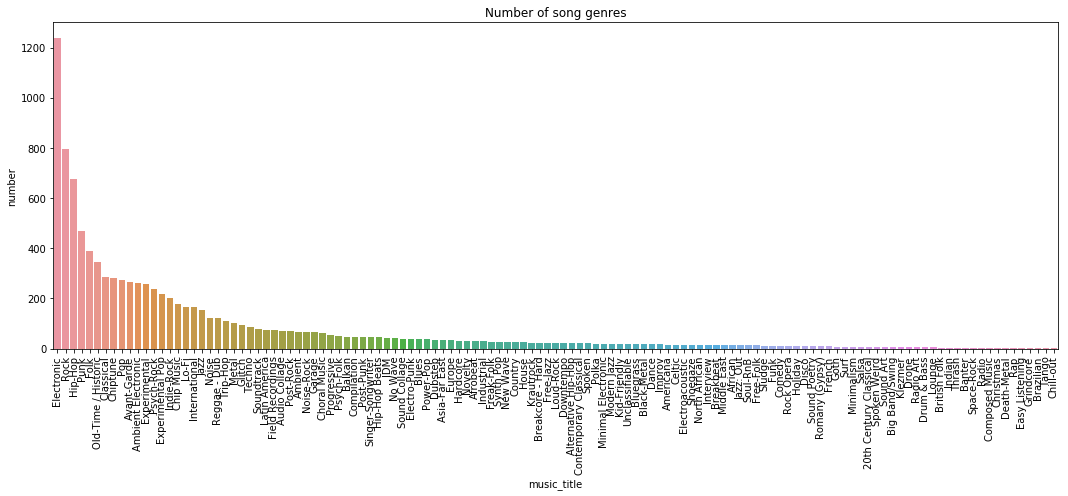

In [15]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

data = df[['track_genres_title','number']].groupby(by='track_genres_title').sum()
data['music_title']=data.index
data = data.sort_values('number',ascending=False)

plt.figure(figsize=(18,6))
sns.barplot(data['music_title'],data['number'])
plt.xticks(rotation=90)
plt.title('Number of song genres')
plt.savefig('1.png')
plt.show()

（7） As can be seen from the above figure, some genres have fewer song data and are not suitable for machine learning. Therefore, fifteen genres with a large amount of audio are selected for training. These fifteen genres will be shown in the image below.

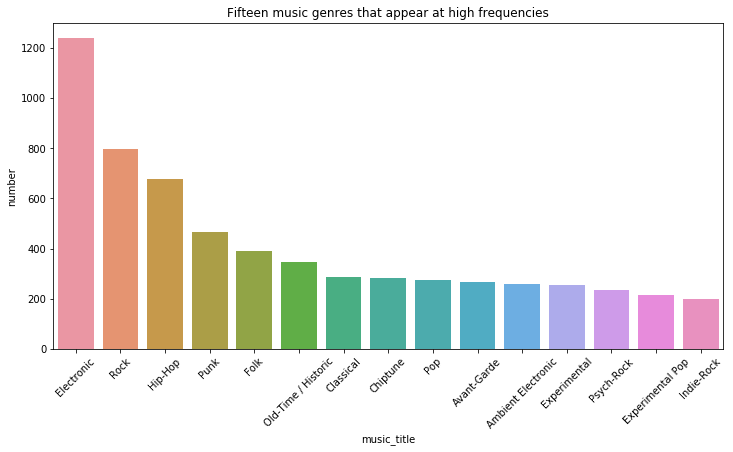

In [16]:

plt.figure(figsize=(12,6))

sns.barplot(data['music_title'].iloc[:15],data['number'].iloc[:15])
plt.xticks(rotation=45)
plt.title('Fifteen music genres that appear at high frequencies')
plt.savefig('2.png')
plt.show()

（7） Take out these genres for training.

In [17]:
data['music_title'].iloc[:15].index

Index(['Electronic', 'Rock', 'Hip-Hop', 'Punk', 'Folk', 'Old-Time / Historic',
       'Classical', 'Chiptune', 'Pop', 'Avant-Garde', 'Ambient Electronic',
       'Experimental', 'Psych-Rock', 'Experimental Pop', 'Indie-Rock'],
      dtype='object', name='track_genres_title')

In [0]:
multi_music=['Electronic', 'Rock', 'Hip-Hop', 'Punk', 'Folk']

In [19]:
df = df[df['track_genres_title'].isin(multi_music)]
df.shape

(3567, 85)

### Music feature selection

(1) Create a training set using all extracted music features.

In [0]:
namelist = ['zcr_mean', 'zcr_std', 'zcr_skew', 'zcr_kurtosis',
                  'zcr_median', 'zcr_min', 'zcr_max', 'chroma_cqt_mean', 'chroma_cqt_std',
                  'chroma_cqt_skew', 'chroma_cqt_kurtosis', 'chroma_cqt_median',
                  'chroma_cqt_min', 'chroma_cqt_max', 'chroma_cens_mean', 'chroma_cens_std',
                  'chroma_cens_skew', 'chroma_cens_kurtosis', 'chroma_cens_median',
                  'chroma_cens_min', 'chroma_cens_max', 'tonnetz_mean', 'tonnetz_std',
                  'tonnetz_skew', 'tonnetz_kurtosis', 'tonnetz_median', 'tonnetz_min',
                  'tonnetz_max', 'chroma_stft_mean', 'chroma_stft_std', 'chroma_stft_skew',
                  'chroma_stft_kurtosis', 'chroma_stft_median', 'chroma_stft_min',
                  'chroma_stft_max', 'rmse_mean', 'rmse_std', 'rmse_skew', 'rmse_kurtosis',
                  'rmse_median', 'rmse_min', 'rmse_max', 'spectral_centroid_mean',
                  'spectral_centroid_std', 'spectral_centroid_skew', 'spectral_centroid_kurtosis',
                  'spectral_centroid_median', 'spectral_centroid_min', 'spectral_centroid_max',
                  'spectral_bandwidth_mean', 'spectral_bandwidth_std', 'spectral_bandwidth_skew',
                  'spectral_bandwidth_kurtosis', 'spectral_bandwidth_median', 'spectral_bandwidth_min',
                  'spectral_bandwidth_max', 'spectral_contrast_mean', 'spectral_contrast_std',
                  'spectral_contrast_skew', 'spectral_contrast_kurtosis', 'spectral_contrast_median',
                  'spectral_contrast_min', 'spectral_contrast_max', 'spectral_rolloff_mean',
                  'spectral_rolloff_std', 'spectral_rolloff_skew', 'spectral_rolloff_kurtosis',
                  'spectral_rolloff_median', 'spectral_rolloff_min', 'spectral_rolloff_max', 'mfcc_mean',
                  'mfcc_std', 'mfcc_skew', 'mfcc_kurtosis', 'mfcc_median', 'mfcc_min', 'mfcc_max']
# Building a training set
X = df[namelist]
y = df['track_genres_id']

(2) After visualizing the Correlations diagram, it is found that the correlation between the data is large, so only some music features need to be selected, not all the features.

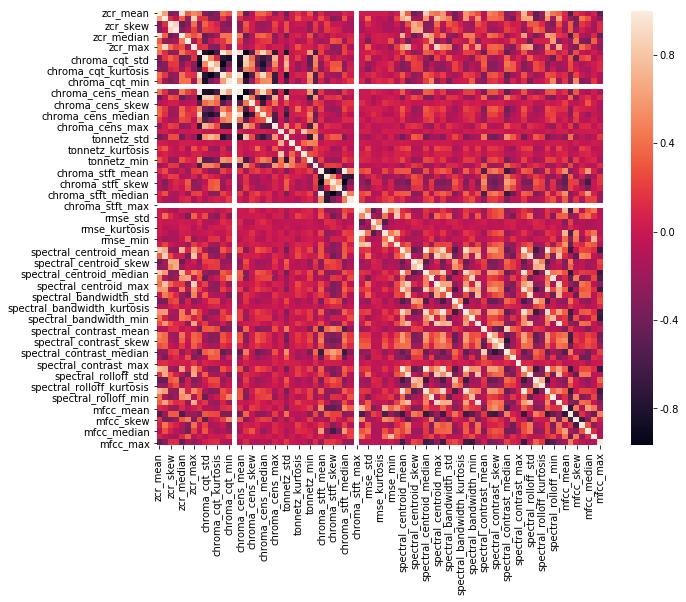

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(X.corr())
plt.savefig('3.png')

In [0]:
# Normalization
scaler = MinMaxScaler()
X=scaler.fit_transform(X)

(3)Due to a large number of music features, the chi-square test is used to select important music features. Chi-square test is a hypothetical test method for a wide range of count data. It belongs to the category of nonparametric tests, mainly comparing two or more sample rates and the correlation analysis of two categorical variables. The fundamental idea of the Chi-square test is to compare the degree of agreement between the theoretical frequency and the actual frequency or the goodness of fit.

In [0]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X_new = SelectKBest(chi2, k=20).fit_transform(X, y)

In [24]:
from imblearn.over_sampling import SMOTE
smo = SMOTE(ratio='auto',random_state=42,k_neighbors=2,m_neighbors=2,out_step=0.1,
            kind='regular',svm_estimator=None,n_jobs=2)
#X_smo, y_smo = smo.fit_sample(X_new, y)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [0]:
X_train,X_test,y_train,y_test = train_test_split(X_new,y,test_size=0.25)

### Identify Challenges
#### Although the data set contains a large number of songs and genres, the amount of music provided in each genre is not the same, or even a large difference, which leads to the problem of data imbalance.

### Design Data Structures
#### This article will use the cross-validation method to divide all data sets into five parts. Four pieces of data are used to train the model, and the remaining one is used to test the model.

## Methodology

### Implement Algorithms
#### This paper mainly uses four algorithms to classify the genre of music, which are K-nearest Neighbors Algorithm, Support Vector Machine Algorithm, Logistic Regression Algorithm and Ensemble Learning Algorithm.

#### (1)KNN(K-nearest Neighbors Algorithm)

The K-nearest neighbor algorithm means that given a training data set, for a new input instance, find the K closest instances to the instance in the training data set, most of which belong to a certain class, and classify the input instance into this class. The k-nearest neighbor algorithm is a basic classification and regression method.

#### (2) SVM(Support Vector Machine Algorithm)

The Support Vector Machine algorithm can be widely applied to statistical classification as well as regression analysis. Support vector machines are generalized linear classifiers. The characteristic of this family of classifiers is that they can simultaneously minimize the empirical error and maximize the geometric edge region. Therefore, the support vector machine is also called the maximum edge region classifier. The support vector machine maps the vector into a higher dimensional space in which a maximum interval hyperplane is created. Two mutually parallel hyperplanes are formed on both sides of the hyperplane separating the data, and the separation of the hyperplane maximizes the distance between the two parallel hyperplanes. Assuming that the distance or gap between parallel hyperplanes is larger, the total error of the classifier is smaller.

#### (3) LR(Logistic Regression Algorithm)

The Logistic Regression algorithm is a machine learning method for solving two-class (0 or 1) problems, which is used to estimate the likelihood of something. It learns the fitting parameters from the sample set, fits the target value to (0,1) and then discretizes the target value to achieve classification.

#### (4) Voting(Ensemble Learning Algorithm)

The ensemble learning algorithm means that the meta-classifier has better generalization performance than the single classifier included by combining different classifiers into one meta-classifier. The integration method used in this paper is the majority voting principle. The majority voting principle refers to the result predicted by most classifiers as the final forecasting class, that is, the result of the number of votes exceeding 50% is used as the class label. Strictly speaking, most votes are only used in the case of two classifications. In this paper, the results of the three models of KNN, SVM, and LR are aggregated by voting to obtain the result.
#### The specific steps to implement those algorithms will show below.

(1) Use training_cure and cv_score of sklearn's learning_curve to draw the learning curve using matplotlib.

Parameter explanation：

(a)estimator: the classifier used;

(b)title: the title of the form;

(c)X : The type of the input, numpy type;

(d)y : the target vector entered;

(e)ylim: (ymin, ymax) in the tuple format, setting the lowest and highest points of the ordinate in the image;

(f)cv: When doing cross-validation, the number of copies of the data, one of which is used as the cv set, and the remaining n-1 are used as training (the default is 3);

(g)n_jobs : the number of tasks in parallel (default is 1);

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y,save_fig='xxx.png', ylim=None, cv=None, n_jobs=1, 
                        train_sizes=np.linspace(.05, 1., 20), verbose=0, plot=True):
   
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, verbose=verbose)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    if plot:
        plt.figure()
        plt.title(title)
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel(u"Number of training samples")
        plt.ylabel(u"Score")
        plt.gca().invert_yaxis()
        plt.grid()
    
        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                         alpha=0.1, color="b")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                         alpha=0.1, color="r")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label=u"Score on the training set")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label=u"Score on the cross validation set")
    
        plt.legend(loc="best")
        
        plt.draw()
        plt.gca().invert_yaxis()
        plt.savefig(save_fig)
        plt.show()
    
    midpoint = ((train_scores_mean[-1] + train_scores_std[-1]) + (test_scores_mean[-1] - test_scores_std[-1])) / 2
    diff = (train_scores_mean[-1] + train_scores_std[-1]) - (test_scores_mean[-1] - test_scores_std[-1])
    return midpoint, diff

(2) Train KNN, SVM, LR and Voting prediction models separately.

In [0]:
# Training KNN prediction model
knn = KNeighborsClassifier(n_neighbors=8)
#SVM
svc = SVC(C=10,gamma='scale', decision_function_shape='ovo')
# LogisticRegression
lr = LogisticRegression(C=0.1,multi_class='multinomial',solver='lbfgs')
# Voting integration algorithm
eclf = VotingClassifier(estimators=[('knn', knn), ('svc', svc), ('dt', lr)], voting='hard')

(3)Visualize the results of the KNN prediction model.

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


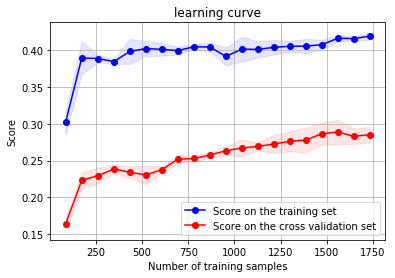

(0.3493602171826571, 0.14943057449827662)

In [28]:
plot_learning_curve(knn, u"learning curve", X_train, y_train,'knn.png')

(4)Visualize the results of the SVM prediction model.

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


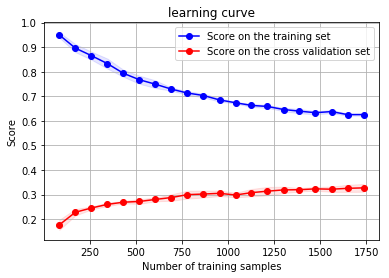

(0.47076110506553415, 0.3184784330218923)

In [29]:
plot_learning_curve(svc, u"learning curve", X_train, y_train,'svm.png')

(5)Visualize the results of the LR prediction model.

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


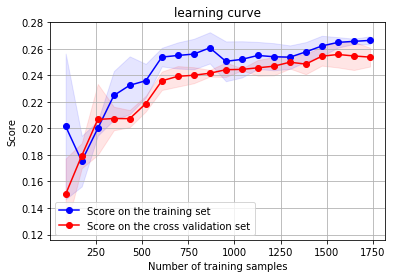

(0.2579877644277516, 0.02276121596840025)

In [30]:
plot_learning_curve(lr, u"learning curve", X_train, y_train,'lr.png')

(6)Visualize the results of the Voting prediction model.

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


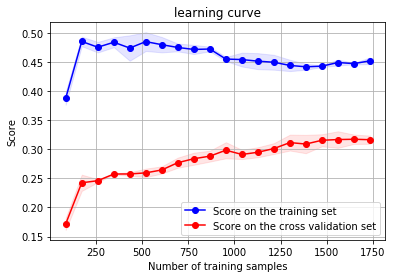

(0.38377325930297157, 0.14858505984387893)

In [31]:
plot_learning_curve(eclf, u"learning curve", X_train, y_train,'vote.png')

### Build and Train Data Models 
#### Using K-fold cross-validation, the initial sample is segmented into K sub-samples, a single subsample is retained as data for the validation model, and the other K-1 samples are used for training. Cross-validation is repeated K times, each sub-sample is verified once, and the average K-time results or other combinations are used to obtain a single estimate finally. The advantage of this method is that it repeatedly uses randomly generated sub-samples for training and verification, and each time the results are verified once. In this paper, K = 5, so the method of five-fold cross-validation is used to predict the results of the four classification methods.

In [0]:
knn_scores = cross_val_score(knn, X,y, cv=5)
svc_scores = cross_val_score(svc, X,y, cv=5)
lr_scores = cross_val_score(lr, X,y, cv=5)
eclf_scores = cross_val_score(eclf, X,y, cv=5)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", 

## Evaluation

### Report Execution on Data

（1） Calculate the accuracy of the four classification methods.

In [0]:
acc_knn = np.mean(knn_scores)
acc_svc = np.mean(svc_scores)
acc_lr = np.mean(lr_scores)
acc_eclf = np.mean(eclf_scores)

print("Accuracy Of kNN:{}".format(acc_knn))
print("Accuracy Of SVM:{}".format(acc_svc))
print("Accuracy Of LR:{}".format(acc_lr))
print("Accuracy Of VOTE:{}".format(acc_eclf))

accuracy_list=[acc_knn,acc_svc,acc_lr,acc_eclf]
x_label=['KNN','SVM','LR','Emsemble']

Accuracy Of kNN:0.2851963896290828
Accuracy Of SVM:0.36078371975988865
Accuracy Of LR:0.2882727088601563
Accuracy Of VOTE:0.3349772991872705


(2) Visualize the accuracy of the four classification methods.

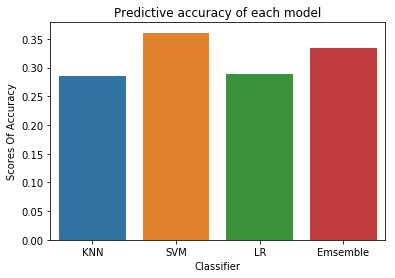

In [0]:
sns.barplot(x_label,accuracy_list)
plt.title('Predictive accuracy of each model')
plt.xlabel('Classifier')
plt.ylabel('Scores Of Accuracy')
plt.savefig('acc.png')
plt.show()

(3)According to the above figure, the accuracy of the support vector machine algorithm is the highest, the accuracy of the ensemble learning algorithm of woting ranks second, and the accuracy of the logistic regression algorithm and the k-nearest neighbors algorithm are very low, and the k-nearest neighbors algorithm has the lowest accuracy.

### Perform and Report Testing
#### In this part, I will use a new piece of music to test the accuracy of the model and see if the genre recommendation system can accurately recommend the genre to which the music belongs. The specific steps are as follows:

(1) Run the Screen.py file to get the following interface.
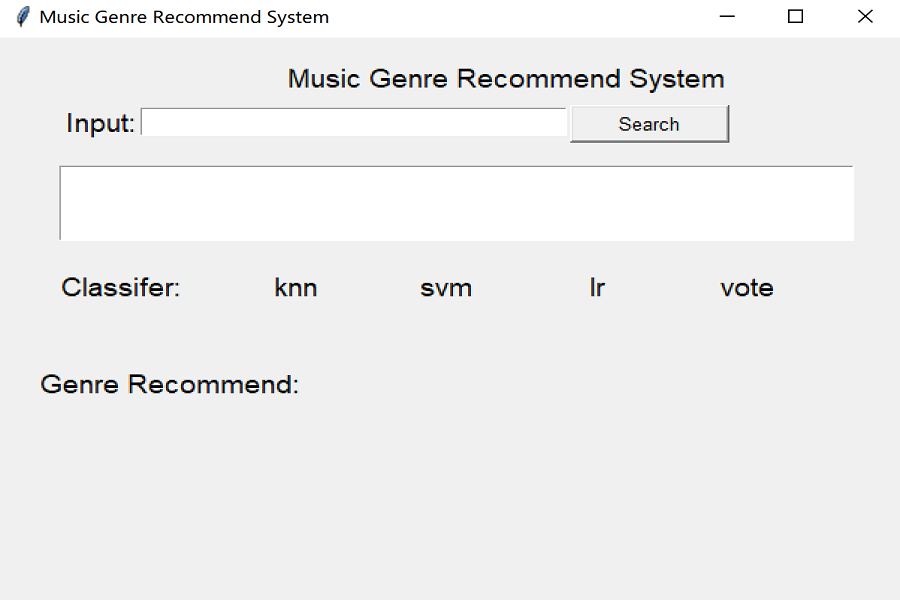

(2) Choose to use the classical music pianist Beethoven's piano piece "For Elise" to test the accuracy of the genre recommendation.
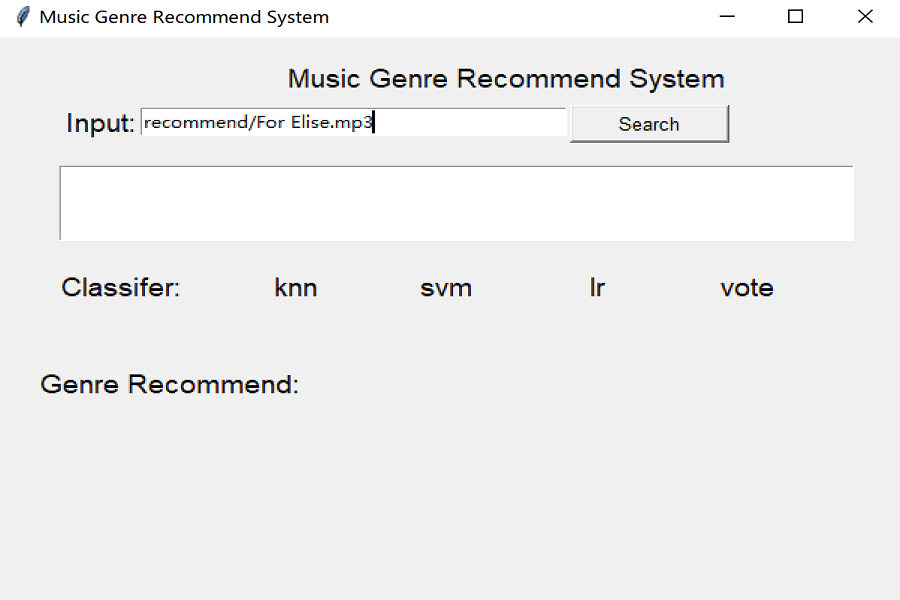

(3) The following figure shows that the genre of the piano piece is recommended to be classical.
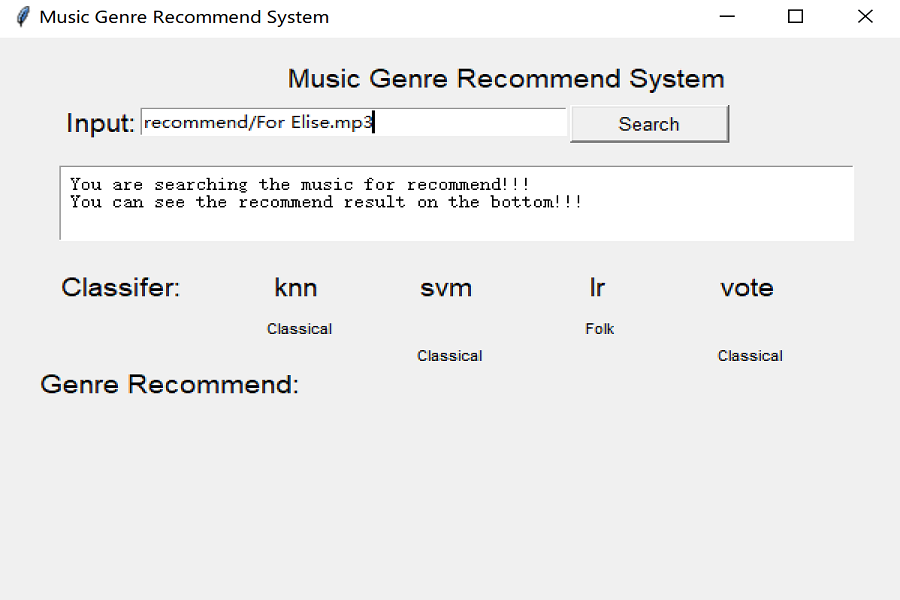


### Perform Efficiency Analysis

#### From the point of view of running time, KNN takes the shortest time, SVM and LR running time are similar, and the  Voting integrated algorithm runs the longest. It can be seen from the learning curve that the KNN algorithm is over-fitting due to the inappropriate selection of some music features. From the learning curve of the SVM algorithm, the trend can be seen. If the amount of data is sufficient, the learning curve of SVM will eventually coincide, and finally, SVM can give a good model for training. The model results of the LR algorithm are relatively good, But both SVM and LR have the problem of under-fitting.

## Conclusion
#### This practical project mainly uses four classification algorithms to classify the genre of the song, thereby realizing to recommend the genre for the song.  Although the recommendation was completed using four common classification algorithms, some problems were also generated during the operation.  During the exploration phase, there was a problem with data imbalance.  This is due to the unequal amount of audio data for each genre, which affects the accuracy of the prediction.  At the same time, in the part of implementing the algorithm, there is a problem of overfitting.  The reason for the overfitting is that the data imbalance and inaccurate extraction features.  Therefore, in further research, it is necessary to pay attention to the balance of data. At the same time, a more accurate method should be selected to select the music features to be extracted, thereby improving the accuracy of classification and recommendation.

## Ethical

#### Utilitarianism believes that people should behave in a way that “achieves the best”. The so-called best calculation must rely on the sum of the perceptual sensations of each individual involved in the act, each of which is considered to have the same weight. And happiness and pain can be converted, and pain is only "negative happiness." Unlike general ethics, utilitarianism does not consider the motives and means of a person's behavior, but only considers the effect of the outcome of one behavior on the maximum happiness value. It is good to increase the maximum happiness value; vice versa. Simply put, utilitarianism pursues the best interests of most people. Although individuals must pursue utilitarianism, the utilitarian benefits of society are greater than the utilitarian interests of individuals. There are also some utilitarian ethical issues in the recommendation algorithm. Taking news software as an example, when the user starts to use, the application software collects various information of the user, such as the type of news clicked, the duration of browsing, and even the time spent on an advertisement picture. Through this information, the recommendation algorithm can know what information the user likes, and can better recommend the user's "interesting" information to the user. However, the recommendation algorithm only recommends the user's content of interest to the user, does not consider whether the recommended content is vulgar, whether negative information is transmitted, and whether the recommended news is ethical. Besides, the recommendation algorithm is to find out the knowledge that the user "likes" likes based on the existing data. In any case, this process will cause a large amount of information attenuation. In this process, the range of information obtained by the user is destined to be compressed, thereby reducing the speed at which the user collects valid information. All of these issues can not be ignored and urgently needed to be resolved.